## Testing Soluntions in Higher Dimensions

In [5]:
import math
import numpy as np
import time, random
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from pydrake.math import sin, cos
from pydrake.all import *
from underactuated import (FindResource, PlanarRigidBodyVisualizer)

In [6]:
%reload_ext autoreload
%autoreload 2
from dynamics_nd import *
from visualizer import *
from optimization import *
from plotting import *

In [7]:
vis = MeshcatCubeVisualizer()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7004/static/


In [12]:
# quadratic cost on input over time
dimension = 4
traj, input_traj, force_traj, time_array = swing_up(dimension)

Initial State: [0.0, 0.0, 0, 0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Final State: [-0.5, 0.20710678118654757, 0, 0, 0.7853981633974483, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of decision vars 1369
SolutionResult.kSolutionFound


In [13]:
# linear interpolation
steps_per_sec = 60
sec = time_array[-1]
num_steps = sec*steps_per_sec
x_interp = np.linspace(0,sec,num_steps)

interp_traj = np.empty((len(x_interp), len(traj[0])))
for i in range(len(traj[0])):
    interp_traj[:,i] = np.interp(x_interp, time_array, traj[:,i])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  """


ValueError: fp and xp are not of the same length.

In [11]:
# trajectory found, but remove the aliasing
print("Time of cycle: {} sec".format(time_array[-1]))
dt = x_interp[1] - x_interp[0]
for i in range(len(interp_traj)):
    vis.draw_transformation(interp_traj[i,:],dimension)
    time.sleep(dt)

Time of cycle: 8.49854866211 sec


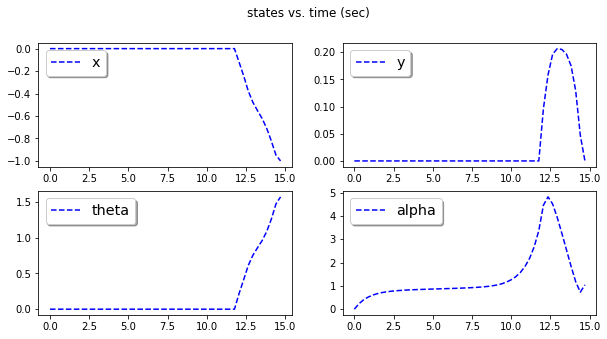

In [13]:
plot_states(traj, time_array, dimension)

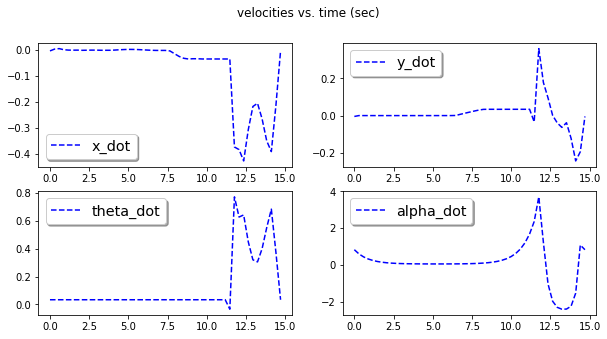

In [14]:
plot_vels(traj, time_array, dimension)

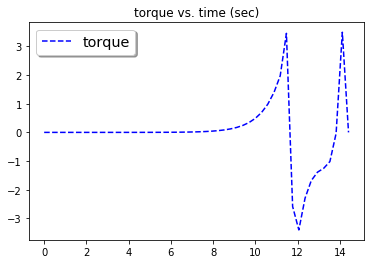

In [15]:
input_plot(input_traj, time_array, dimension)

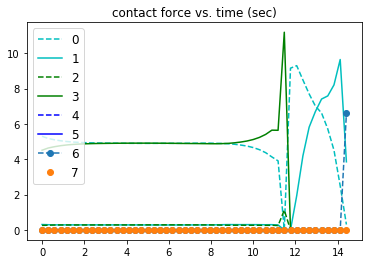

In [16]:
ground_force_plot(force_traj, time_array, dimension)